# Neural networks with Jax!

![img](https://jax.readthedocs.io/en/latest/_static/jax_logo_250px.png)

Jax is an efficient computation package (think `numpy` with coprocessors) that includes automatic differentiation of functions. Jax has become quite popular in recent years for many different fields, including machine learning.

Let's start by exploring the parts of the package that are useful for us.


In [3]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

Let's build a simple function for

$$f(x) = \sin{3x}$$

This is a function that we (hopefully) know the derivative for, so let's also code a function that returns the analytic derivative for comparison.

In [4]:
# standard way of defining a python function
def f(x):
    return jnp.sin(3*x) # using jax numpy operations

# define a function for the analytic derivative (not using automatic differentiation)
def fprime(x):
    return 3*jnp.cos(3*x) # still can use jax numpy for faster operations

Now, let's use the automatic differentiation engine within Jax and compare it to a known derivative using `jax.grad()`

https://jax.readthedocs.io/en/latest/notebooks/quickstart.html#taking-derivatives-with-grad#

In [5]:
# transform the f(x) function into a function for f(x)'s gradient
diff_f = jax.grad(f)

print("autodiff derivative:", diff_f(5.))
print("analytic dericative:", fprime(5.))





No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


autodiff derivative: -2.2790637
analytic dericative: -2.2790637


You should observe that the autodiff result is *exact* to numerical roundoff. That is because (as we saw last Thursday) this is an analytically exact method, not a numeric method. Try modifying the above cells with a different function.

Notice that `jax.grad` transforms a fuction. Therefore, `diff_f(x)` is a tranformed function that computes the gradient (e.g. derivative), of `f(x)`.

---

## Now, let's create some data for a regression task.

I will create a synthetic dataset with three features that map to our ground truth outputd $y$ via the function
$$y = .5c + .2x + 2*x +σ,$$ where $σ$ is noise.


In [6]:
# define our synthetic data
N = 1000 # number of examples
n_feat = 3
x = np.random.uniform(size=(N,n_feat))

def true(x):
    return .5*x[:,0] + .2*x[:,1] + 2*x[:,2] + np.random.normal(scale=.1)

y = true(x)

In [130]:
#checking that the data looks as expected
#plt.plot(x[:,0], y,'.')
#plt.show()

## Let's first build a linear regression model, and find the optimal model parameters via gradient descent.

We know that the data follows a linear trend, **and** we know the coefficients. This is a great testing ground for this package. 

We are going to build the same algorithm as we did for linear regression via gradient descent at the beginning of the semester, but we will use automatic differentiation for computing gradients.

To maximize the efficiency of the I am going to build a model that will simultaneouly predict on the entire training dataset. To do this, I need some linear algebra.


$ \mathbf{x} $ with 4 examples and 3 features, is represented as:
$$
\mathbf{x} = \begin{bmatrix}
x_{11} & x_{12} & x_{13} \\
x_{21} & x_{22} & x_{23} \\
x_{31} & x_{32} & x_{33} \\
x_{41} & x_{42} & x_{43}
\end{bmatrix}
$$
And our model weights vector
$$
\mathbf{w} = \begin{bmatrix}
w_1 \\
w_2 \\
w_3
\end{bmatrix}
$$



The model $$ \mathbf{y_{pred}} = \mathbf{x} \cdot \mathbf{w} $$ will provide a $4 \times 1$ array of predictions, one for each example.

$$
\mathbf{y_{pred}} = \begin{bmatrix}
w_1x_{11} + w_2x_{12} + w_3x_{13} \\
w_1x_{21} + w_2x_{22} + w_3x_{23} \\
w_1x_{31} + w_2x_{32} + w_3x_{33}
\end{bmatrix}
$$

(*Note: I left out the bias term, which is not good practice but ok for our simple example because the ground truth model has no bias.*)

In [11]:
# Define the linear regression model described above
def model(w,x):
    return jnp.dot(x,w) #using jax operations

# Define the mean squared error loss function
# jnp.mean() can help you here
def loss(w,x,y_tr):
    #complete me
    
    return


# Define the gradient of the loss function (above example can help here)


# Perform gradient descent to optimize the parameters
# and keep track of the loss on the training data and the validation data
def gradient_descent(w, xtrain, ytrain, xval, yval, learning_rate=0.1, num_epochs=100):
    loss_f = np.zeros(num_epochs)
    valloss_f = np.zeros(num_epochs)
    for i in range(num_epochs):
        # compute the gradient (complete me)

        
        # add losses for plotting
        loss_f[i] = loss(w,xtrain,ytrain)
        valloss_f[i] = loss(w,xval,yval)
        # update weights (complete me)
        
        
    return w, loss_f, valloss_f

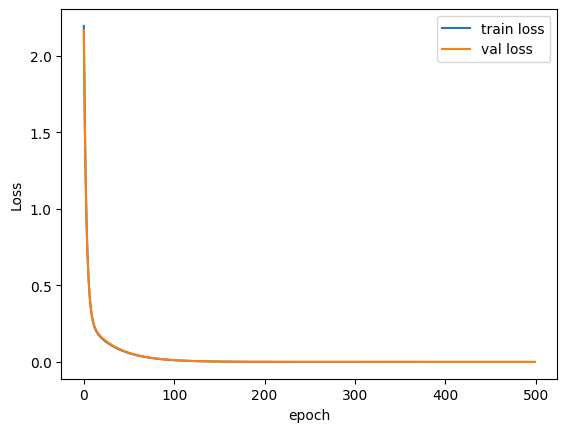

Learned parameters: [0.52659094 0.22574332 2.025286  ]
Prediction for x_test: [1.3888102]
True for x_test: [1.19352745]


In [132]:

# Initialize parameters randomly
key = jax.random.PRNGKey(5) ## seeding the RNG
w = jax.random.normal(key, (3,))
split = int((N*.8)//1) # train/val split

# yah, I could have done this better using sklearn :)]
# training data
train_x = x[:split] 
train_y = y[:split]
# val data
val_x = x[split:]
val_y = y[split:]
# make a test set for final performance metric


# Perform gradient descent
w, lossf, val_lossf = gradient_descent(w, train_x, train_y, val_x, val_y, learning_rate=.1, num_epochs=500)
plt.plot(lossf, label="train loss")
plt.plot(val_lossf, label="val loss")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
# Print the learned parameters
print("Learned parameters:", w)

# Test the model with test data




### Awesome! You should have gotten decent results, and the code should have been simpler and faster to execute than our first go at linear regression.
 ---

# Neural Networks

Let's now apply what we have learned to build a simple regression neural network with 1 hidden layer of 4 nodes.

The trick here is to create a 2D **matrix** of weights, where number of rows is the number weights in the model and the number of columns is the number of nodes in the layer. This allows us to operate on the entire *layer* at once.

In [133]:
# Build our neural network layers

# sigmoid activation for our hidden layer
def sigmoid_layer(sig_w,x):
    #using jax operations: jnp.dot(x,w)
    
    return

# linear activation for our output layer (for a regression model)
def linear(lin_w,inputs):
    #again use jnp.dot(x,w)
    
    return


def nn_model(ws,x):
    # get weights for each layer
    w_sig = ws[0]
    w_lin = ws[1]
    # complete me

  return y_pred


# Define the mean squared error loss function
def nn_loss(w,x,y):
    # complete me
    
    return


# Define the gradient of the loss function

# Perform gradient descent to optimize the parameters
def nn_gradient_descent(w, xtrain, ytrain, xval, yval, learning_rate=.1, num_epochs=1000):
    w1, w2 = w
    #print("ws",w1,w2)
    loss_f = np.zeros(num_epochs)
    valloss_f = np.zeros(num_epochs)
    for i in range(num_epochs):
        # complete me
    
        w = [w1,w2]
        

        loss_f[i] = nn_loss(w,xtrain,ytrain)
        valloss_f[i] = nn_loss(w,xval,yval)

    return w, loss_f, valloss_f

### Follow your linear regression example to train your (maybe) first neural network!

We will use the same data as our linear model above.

Plot your loss curve and make predictions on your test set.

Play around! 

In [7]:

# Initialize parameters randomly
key = jax.random.PRNGKey(22)
num_features = len(x[0])
num_hidden = 3

# layer 1: num features * num nodes
w1 = jax.random.normal(key, (num_features, num_hidden))

# layer 2: num inputs * num nodes (1)
w2 = jax.random.normal(key, (3,))




NameError: name 'nn_gradient_descent' is not defined